In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df_ps= pd.read_csv("Product_summary.csv")

In [135]:
df_ps.head(5)

,ASIN,title,url,rating,review_count,price,product_type
0,B08L6ZRMMF,Ca Powershot SX420 Point & Shoot Digital Camer...,https://www.amazon.com/gp/slredirect/picassoRe...,4.3,39.0,299,dslr camera
1,B00M8C7U8I,KODAK PIXPRO Astro Zoom AZ421-WH 16MP Digital ...,https://www.amazon.com/gp/slredirect/picassoRe...,4.4,2596.0,159,dslr camera
2,B0101RW3QK,Ca EOS REBEL T7 DSLR Camera|2 Lens Kit with EF...,https://www.amazon.com/Rebel-EF18-55mm-75-300m...,4.8,152.0,NaN,dslr camera
3,B08DQ4QQ6R,Ca EOS 4000D / Rebel T100 Digital SLR Camera B...,https://www.amazon.com/Ca-4000D-Digital-Comple...,4.5,86.0,509.95,dslr camera
4,B08S5FD42N,Ca EOS 2000D / Rebel T7 Digital SLR Camera Bod...,https://www.amazon.com/Ca-2000D-Digital-Comple...,4.7,36.0,549.95,dslr camera


In [136]:
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49238 entries, 0 to 49237
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ASIN          49238 non-null  object 
 1   title         49238 non-null  object 
 2   url           49238 non-null  object 
 3   rating        45155 non-null  float64
 4   review_count  45155 non-null  float64
 5   price         44264 non-null  object 
 6   product_type  49238 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.6+ MB


In [137]:
df_ps.describe

<bound method NDFrame.describe of              ASIN                                              title  \
0      B08L6ZRMMF  Ca Powershot SX420 Point & Shoot Digital Camer...   
1      B00M8C7U8I  KODAK PIXPRO Astro Zoom AZ421-WH 16MP Digital ...   
2      B0101RW3QK  Ca EOS REBEL T7 DSLR Camera|2 Lens Kit with EF...   
3      B08DQ4QQ6R  Ca EOS 4000D / Rebel T100 Digital SLR Camera B...   
4      B08S5FD42N  Ca EOS 2000D / Rebel T7 Digital SLR Camera Bod...   
...           ...                                                ...   
49233  B010NZ53EY  Koomus Pro Dash Universal Dashboard Windshield...   
49234  B07CWQGX93  USB Wall Charger, Small Surge Protector, POWRU...   
49235  B07YYZ7M22  GLOUE Selfie Light Ring LED Round Clip self-Ti...   
49236  B08BWSB82B  P40 Plus Smartphone with 4+64 GB+64G TF Large ...   
49237  B08Z3D8G7N  Micro SD Card 128GB with Adapter High Speed Mi...   

                                                     url  rating  \
0      https://www.amazon.com/gp/

In [138]:
df_ps.isnull().sum()

ASIN               0
title              0
url                0
rating          4083
review_count    4083
price           4974
product_type       0
dtype: int64

In [139]:
df_ps.dropna(inplace=True)

In [140]:
df_ps.isnull().sum()

ASIN            0
title           0
url             0
rating          0
review_count    0
price           0
product_type    0
dtype: int64

In [144]:
#
#df_ps.loc[df_ps['rating'] == 'Non', 'review_count'].values[0]
#df_ps.review_count=df_ps.review_count.str.replace(",","")
df_ps.price = df_ps.price.str.replace(",","")

In [145]:
df_ps.rating = df_ps.rating.astype("float")
df_ps.review_count = df_ps.review_count.astype('int')
df_ps.price = df_ps.price.astype('float')
df_ps.product_type = df_ps.product_type.astype('str')

In [146]:
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40654 entries, 0 to 49235
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ASIN          40654 non-null  object 
 1   title         40654 non-null  object 
 2   url           40654 non-null  object 
 3   rating        40654 non-null  float64
 4   review_count  40654 non-null  int32  
 5   price         40654 non-null  float64
 6   product_type  40654 non-null  object 
dtypes: float64(2), int32(1), object(4)
memory usage: 2.3+ MB


In [147]:
#df_ps['sponsored'] = df_ps['title'].duplicated(keep=False).astype(int).astype(str)
#df_ps

In [148]:
df = df_ps.drop_duplicates(subset=['title'])

In [149]:
#df_ps.to_csv('Product_summary.csv', index = False)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27541 entries, 0 to 49235
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ASIN          27541 non-null  object 
 1   title         27541 non-null  object 
 2   url           27541 non-null  object 
 3   rating        27541 non-null  float64
 4   review_count  27541 non-null  int32  
 5   price         27541 non-null  float64
 6   product_type  27541 non-null  object 
dtypes: float64(2), int32(1), object(4)
memory usage: 1.6+ MB


In [152]:
df1 = df.groupby('product_type').head(3).sort_values('rating',ascending = False)
print (df1)


             ASIN                                              title  \
40189  B07SXMZLPK  AMD Ryzen 7 3700X 8-Core, 16-Thread Unlocked D...   
32710  157850550X  Oriental Carpet Mouse Pad - Authentic Woven Ca...   
40190  B07HHN6KBZ  Intel Core i7-9700K Desktop Processor 8 Cores ...   
25258  B08BF4CZSV  HP 24mh FHD Monitor - Computer Monitor with 23...   
25256  B07VKPWYQ5  ViewSonic ELITE XG270QC Curved 27 Inch 1ms 144...   
21751  B07RF1XD36  Acer Aspire 5 Slim Laptop, 15.6 inches Full HD...   
41750  B08J5K993Y  TracFone Samsung Galaxy A21 4G LTE Prepaid Sma...   
32711  B00000JRRD  Belkin WaveRest Gel Mouse Pad, Black (F8E262-BLK)   
41753  B08FYV84JT  Samsung Galaxy S20 FE 5G | Factory Unlocked An...   
14928  B079JLY5M5  Logitech MK270 Wireless Keyboard and Mouse Com...   
21750  B08B3S21WQ  2020 Newest Acer Aspire 5 Slim Laptop 15.6" FH...   
7459   B08F1SX35C  TOZO T6 True Wireless Earbuds Bluetooth Headph...   
40188  B08RBJCQVP  Tablet 10 Inch Octa-Core Processor, 2GB, 32GB

In [158]:
top3_sell = df1.sort_values(by=['product_type','rating'], ascending=False)

In [168]:
q1 = top3_sell[['title','rating','review_count','product_type']]

In [169]:
q1

,title,rating,review_count,product_type
41750,TracFone Samsung Galaxy A21 4G LTE Prepaid Sma...,4.6,3,smartphone
41753,Samsung Galaxy S20 FE 5G | Factory Unlocked An...,4.6,3947,smartphone
41751,TracFone LG K31 Rebel 4G LTE Prepaid Smartphon...,3.9,61,smartphone
25258,HP 24mh FHD Monitor - Computer Monitor with 23...,4.8,12273,monitor
25256,ViewSonic ELITE XG270QC Curved 27 Inch 1ms 144...,4.7,1174,monitor
25257,"Trio Max Portable Monitor for Laptop, Mobile P...",4.3,197,monitor
7459,TOZO T6 True Wireless Earbuds Bluetooth Headph...,4.5,106219,headphones
7457,COWIN E7 PRO [Upgraded] Active Noise Cancellin...,4.4,27251,headphones
7456,COWIN E7 Active Noise Cancelling Headphones Bl...,4.4,69726,headphones
3,Ca EOS 4000D / Rebel T100 Digital SLR Camera B...,4.5,86,dslr camera


C:\Users\ARUNRAJ\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


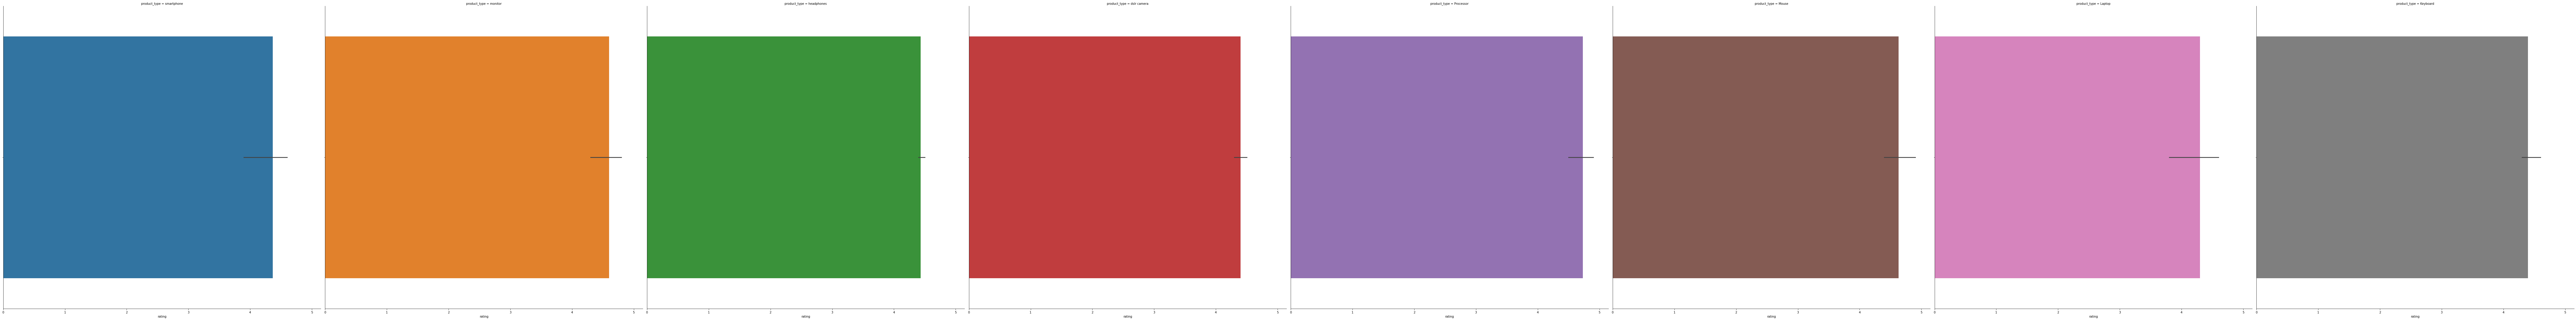

In [188]:
g = sns.FacetGrid(q1, col = 'product_type',hue = 'product_type',height = 15,aspect=1)
g.map(sns.barplot,'rating')

C:\Users\ARUNRAJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ARUNRAJ\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
C:\Users\ARUNRAJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ARUNRAJ\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)


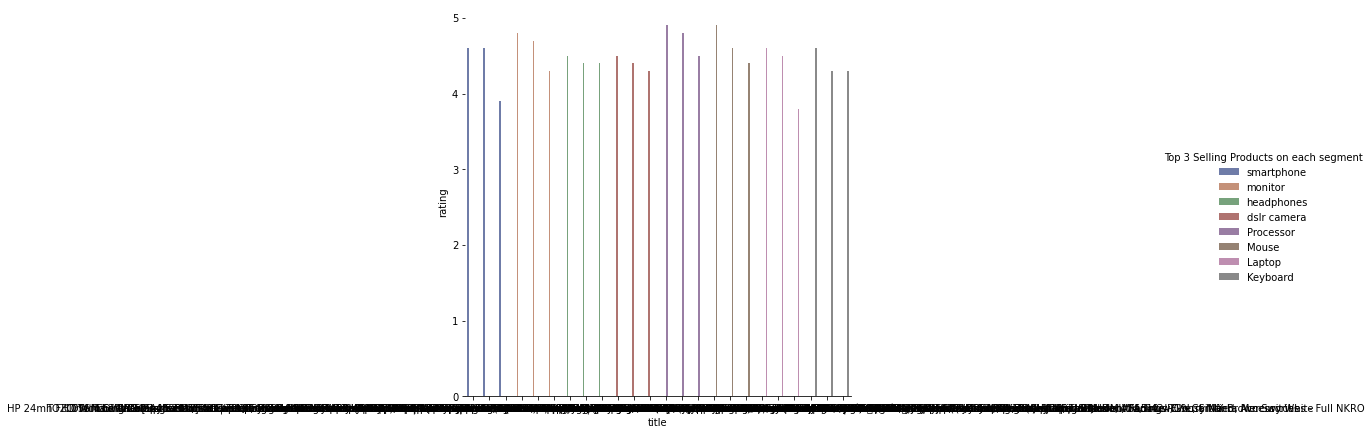

In [187]:
g = sns.catplot(
    data=q1, kind="bar",
    x="title", y="rating", hue="product_type",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
#g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("Top 3 Selling Products on each segment")

C:\Users\ARUNRAJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ARUNRAJ\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
C:\Users\ARUNRAJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)


C:\Users\ARUNRAJ\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)


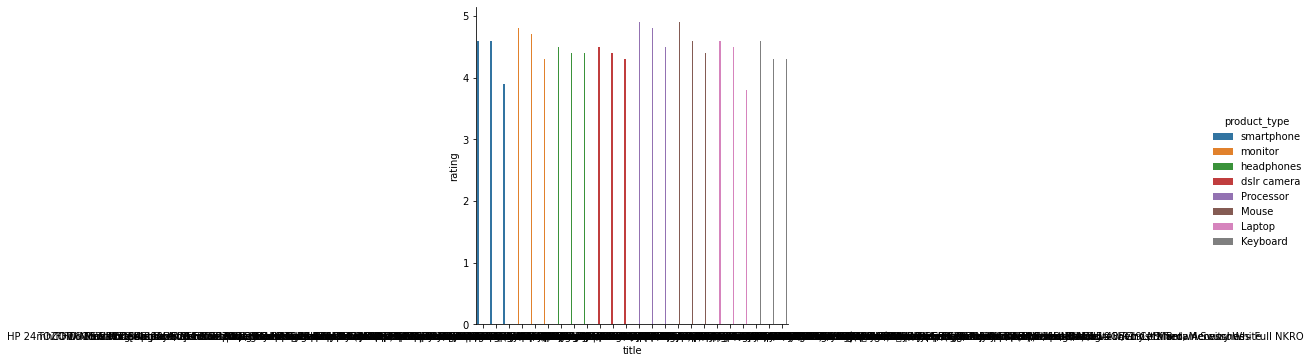

In [189]:
sns.catplot(x="title", y="rating", hue="product_type", kind="bar", data=q1)

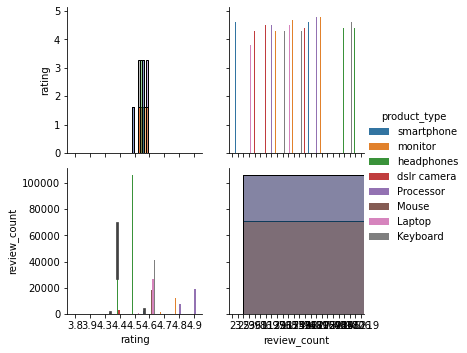

In [190]:
g = sns.PairGrid(q1, hue="product_type")
g.map_diag(sns.histplot)
g.map_offdiag(sns.barplot)
g.add_legend()

In [194]:
df_top= pd.read_excel("plots-Ecom.xlsx")

In [195]:
df_top

,title,rating,product_type,review_count
0,Ca EOS 4000D / Rebel T100,4.5,dslr camera,86
1,KODAK PIXPRO Astro Zoom AZ421,4.4,dslr camera,2596
2,Ca Powershot SX420 Point & Shoot,4.3,dslr camera,39
3,TOZO T6 True Wireless Earbuds Bluetooth Headph...,4.5,headphones,106219
4,COWIN E7 PRO,4.4,headphones,27251
5,COWIN E7,4.4,headphones,69726
6,Logitech MK270,4.6,Keyboard,41180
7,Manhattan Black,4.3,Keyboard,1558
8,Das Keyboard Model S,4.3,Keyboard,396
9,Apple MacBook Air,4.8,Laptop,9939


In [197]:
g = sns.FacetGrid(df_top, col = 'product_type',hue = 'rating',height = 15,aspect=1)
g.map(sns.barplot,df_top['title'])

C:\Users\ARUNRAJ\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


KeyError: "None of [Index([('Ca EOS 4000D / Rebel T100', 'KODAK PIXPRO Astro Zoom AZ421', 'Ca Powershot SX420 Point & Shoot', 'TOZO T6 True Wireless Earbuds Bluetooth Headph...', 'COWIN E7 PRO', 'COWIN E7 ', 'Logitech MK270 ', 'Manhattan Black', 'Das Keyboard Model S ', 'Apple MacBook Air', 'Acer Aspire 5 Slim', 'Apple MacBook Pro ', 'HP 24mh FHD Monitor ', 'ViewSonic ELITE XG270QC ', 'Trio Max Portable Monitor ', 'SteelSeries QcK Gaming mouse', 'Logitech G502 Hero Wired Gaming Mouse', 'seenda Wireless Mouse', 'AMD Ryzen 7 3700X 8-Core', 'Intel Core i7-9700K ', 'Tablet 10 Inch Octa-Core Processor', 'Xiaomi Redmi Note8 Pro ', 'Samsung Galaxy S20 FE 5G', 'Xiaomi Redmi Note 9 Pro ')], dtype='object')] are in the [columns]"